In [10]:
import csv 
file= open('C:/Users/Admin/Documents/kmeans.csv')
csvreader = csv.reader(file)
row=[]
for i in csvreader:
    row.append(i)
row

[['X1', 'X2'],
 ['2.3', '3.2'],
 ['5.4', '2.8'],
 ['6', '5.6'],
 ['7', '2.4'],
 ['8.9', '3.1'],
 ['3.1', '3.8'],
 ['5.1', '3'],
 ['7.8', '4.2'],
 ['4.9', '3.1'],
 ['1.6', '4.2']]

In [11]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=2
import random as rd
import matplotlib.pyplot as plt

In [12]:
X = pd.read_csv('C:/Users/Admin/Documents/kmeans.csv')
print(X)

    X1   X2
0  2.3  3.2
1  5.4  2.8
2  6.0  5.6
3  7.0  2.4
4  8.9  3.1
5  3.1  3.8
6  5.1  3.0
7  7.8  4.2
8  4.9  3.1
9  1.6  4.2


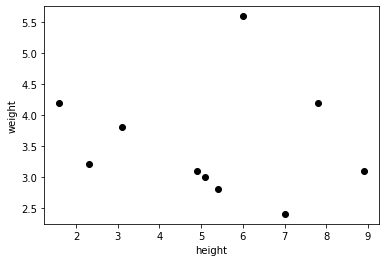

In [13]:
X = X[["X1", "X2"]]
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [14]:
x1=X['X1'].values
x2=X['X2'].values

In [15]:
x1

array([2.3, 5.4, 6. , 7. , 8.9, 3.1, 5.1, 7.8, 4.9, 1.6])

In [16]:
x2

array([3.2, 2.8, 5.6, 2.4, 3.1, 3.8, 3. , 4.2, 3.1, 4.2])

In [17]:
X=np.array(list(zip(x1,x2)))
print(X)

[[2.3 3.2]
 [5.4 2.8]
 [6.  5.6]
 [7.  2.4]
 [8.9 3.1]
 [3.1 3.8]
 [5.1 3. ]
 [7.8 4.2]
 [4.9 3.1]
 [1.6 4.2]]


In [18]:
C_x = [4,6,7]
C_y = [2,3,4]

In [19]:
Centroid = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print("initial centroids")
print(Centroid.shape)

initial centroids
(3, 2)


In [20]:
Centroid

array([[4., 2.],
       [6., 3.],
       [7., 4.]], dtype=float32)

In [21]:
type(Centroid)

numpy.ndarray

In [22]:
Centroid_old =np.zeros(Centroid.shape)
print(Centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [23]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
[1,2,0,0,1,2,1,0,1,0]

[1, 2, 0, 0, 1, 2, 1, 0, 1, 0]

In [25]:
def euclidean(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [26]:
error=euclidean(Centroid,Centroid_old,None)
print(error)

11.40175425099138


In [27]:
iterr=0

In [28]:
while error != 0:
    iterr=iterr + 1
    for i in range(len(X)):
        distances = euclidean(X[i],Centroid)
        cluster = np.argmin(distances)
        clusters[i]=cluster
    Centroid_old = deepcopy(Centroid)
    print("OLd centroid")
    print(Centroid_old)
    
    for p in range(k):
        points=[X[j] for j in range(len(X)) if clusters[j] == p]
        Centroid[p]= np.mean(points,axis=0)
    print("new centroids after",iterr,"Iteration \n",Centroid)
    error=euclidean(Centroid,Centroid_old,None)
    print("Error ",error)
    print("data points belong to which cluster")
    print(clusters)

OLd centroid
[[4. 2.]
 [6. 3.]
 [7. 4.]]
new centroids after 1 Iteration 
 [[2.3333333 3.7333333]
 [5.6       2.825    ]
 [7.        4.       ]]
Error  2.443941
data points belong to which cluster
[0. 1. 2. 1. 2. 0. 1. 2. 1. 0.]
OLd centroid
[[2.3333333 3.7333333]
 [5.6       2.825    ]
 [7.        4.       ]]
new centroids after 2 Iteration 
 [[2.3333333 3.7333333]
 [5.6       2.825    ]
 [7.        4.       ]]
Error  0.0
data points belong to which cluster
[0. 1. 2. 1. 2. 0. 1. 2. 1. 0.]
